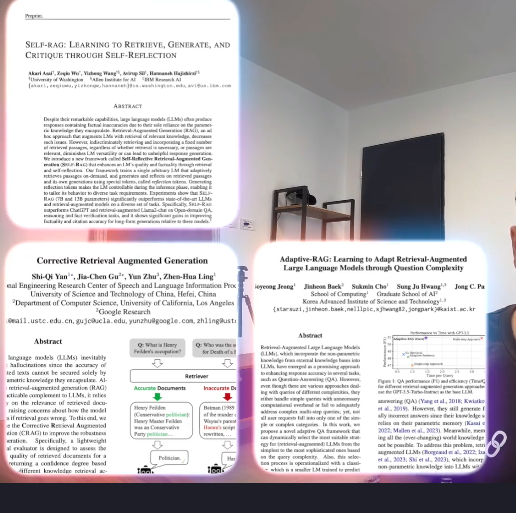

the general idea of those papers is to add reflection into our workflow (retrieved documents, answer).

- we want to reflect on the documents that we retrieve and to see if they are indeed correct for us or not. We want to curate those documents and add new information. If it's not enough, after our reflection.
- we also want to reflect on the answer. So we want to check if the answer is indeed grounded in the documents, and that the answer indeed answers the question.

# CRAG: Corrective RAG

[link](https://arxiv.org/pdf/2401.15884)
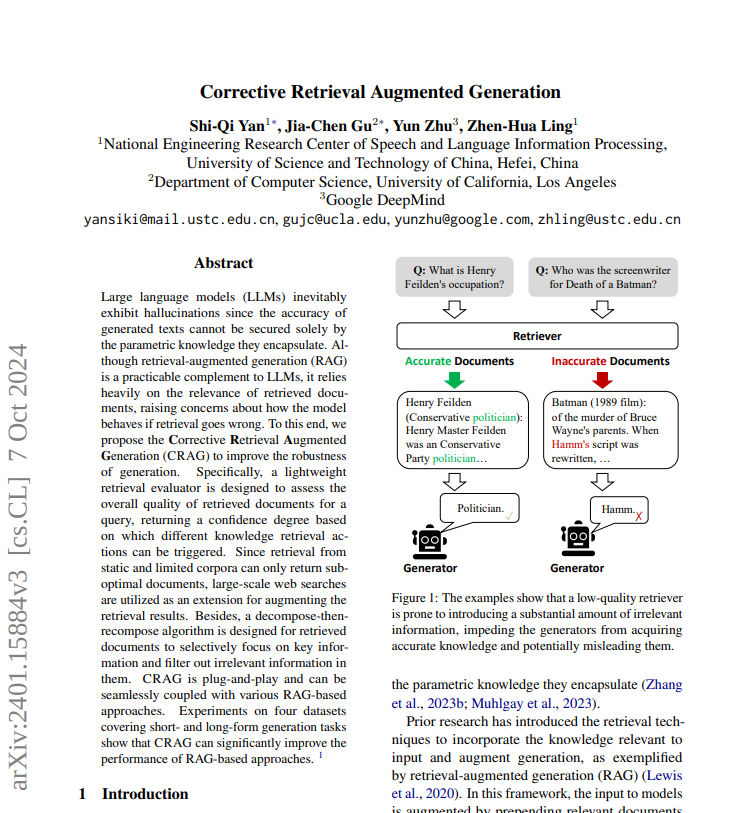

## CRAG on the course, explained in video27

- We first want to start by taking our query performing in the vector. Semantic search and retrieving relevant documents from our vector store. 
- After we have all. Those documents, we want to start and self-reflect, to critique those documents and to. Determine whether they are indeed relevant to our original query or not. 
- If all of the documents are relevant to our query, then this is a happy flow and we simply want to augment our original prompt and send everything to the LLM like we always do in RAC. 
- However, if you find document that we find out that are not relevant to our query, of course we want to filter the null and we also want to perform some external search on the internet and get to more information.


![image-3.png](attachment:image-3.png)

# 🛠️ Corrective RAG (Retrieval-Augmented Generation)

## 🔍 Standard RAG Overview

**RAG (Retrieval-Augmented Generation)** combines:
- A **retriever**: fetches relevant documents/passages from a knowledge base.
- A **generator**: (usually a large language model) uses the retrieved context to generate informed answers.

This architecture helps models extend beyond static training data by incorporating up-to-date or domain-specific external information.

---

## 🛠️ What is Corrective RAG?

**Corrective RAG** enhances standard RAG by introducing mechanisms to **detect and fix issues** in either the retrieval or generation stages. Its goal is to improve:
- Factual accuracy
- Relevance
- Completeness

**Analogy**:	Like a proofreader that finds and corrects mistakes

### Key Components:

1. **Error Detection via self-reflect**
   - Identify irrelevant, outdated, or misleading retrieval results: if you find document that are not relevant to our query, we want to filter them out.
   - Spot hallucinations or inconsistencies in generated responses.

2. **Self-Correction / Iterative Refinement**
   - Re-query or adjust the retrieval process based on errors.
   - Regenerate answers with improved context.
   - Use feedback signals (e.g., scoring models, uncertainty measures) to correct outputs.

3. **Multi-Step Reasoning**
   - Use intermediate steps like chain-of-thought reasoning or critique-refine cycles.
   - Improve answer quality through multi-pass processing.

---

## 🧠 Example Use Case

A legal assistant RAG system retrieves outdated case law and generates a misleading summary.

**Corrective RAG steps in to:**
- Detect inconsistency between the question and retrievals.
- Re-rank or reformulate the query to get better context.
- Regenerate the response using the corrected documents.

---

## ✅ Benefits

- Enhanced factual accuracy
- Better performance in edge cases: edge case do not have a lot of relevent docs. when you set top-k=10, the retrieved docs may contain irrelevent docs, crag identifies and fillters out these docs. 
- Robustness to retrieval failures
- Greater reliability and user trust

---

## 🔁 Techniques Used in Corrective RAG

- Feedback mechanisms (e.g., Reinforcement Learning from Human Feedback)
- Retrieval re-ranking and query rewriting
- Output verification (e.g., factual consistency checks)
- Prompt chaining or critique-then-refine loops

---

Corrective RAG is a powerful framework for building **reliable, adaptive** AI systems that can correct themselves and improve over time.


<br>
<br>
<br>

# ✅ Corrective RAG vs. Adaptive RAG

**Corrective RAG** and **Adaptive RAG** are both evolutions of the standard Retrieval-Augmented Generation (RAG) architecture, but they focus on different strategies for improvement.

---

## 🛠️ Key Differences

| Aspect                  | **Corrective RAG**                                      | **Adaptive RAG**                                            |
|-------------------------|---------------------------------------------------------|-------------------------------------------------------------|
| **Core Idea**           | Detects and **fixes errors** in retrieval or generation | Dynamically **adapts retrieval/generation** to task context |
| **Focus**               | Error correction and refinement                         | Flexibility and optimization for different contexts/tasks   |
| **Trigger for Change**  | Errors (e.g. hallucinations, irrelevant docs)           | Context, user behavior, domain, or input type               |
| **Examples of Behavior**| Re-retrieves or regenerates when inconsistencies are found | Changes retrieval strategy based on domain (e.g. legal vs medical) |
| **Techniques Used**     | - Consistency checking  <br> - Critique & refine loops  <br> - Self-evaluation of responses | - Task-aware retriever tuning  <br> - Query reformulation  <br> - User personalization |
| **Analogy**             | Like a proofreader that finds and fixes mistakes        | Like a smart assistant that adapts to your preferences      |

---

## 🔍 Examples

### 🔧 Corrective RAG
- A system answers a query using outdated or irrelevant documents.
- It identifies the issue using a consistency checker or re-ranking model.
- Then it **re-retrieves** better documents and **regenerates** the response.

### 🔄 Adaptive RAG
- A user starts asking medical-related questions.
- The system **adapts** by:
  - Switching to a medical-specific retriever or knowledge base.
  - Reformulating queries to better match the style of medical literature.

---

## 🧠 Summary

- **Corrective RAG** is **reactive**: It responds to errors by fixing them.
- **Adaptive RAG** is **proactive**: It tailors its behavior based on context, domain, or user needs.

> 🔁 **Combined Approach:** In practice, Adaptive RAG systems can incorporate Corrective RAG mechanisms for both flexibility and reliability.



<br>
<br>
<br>

# self RAG

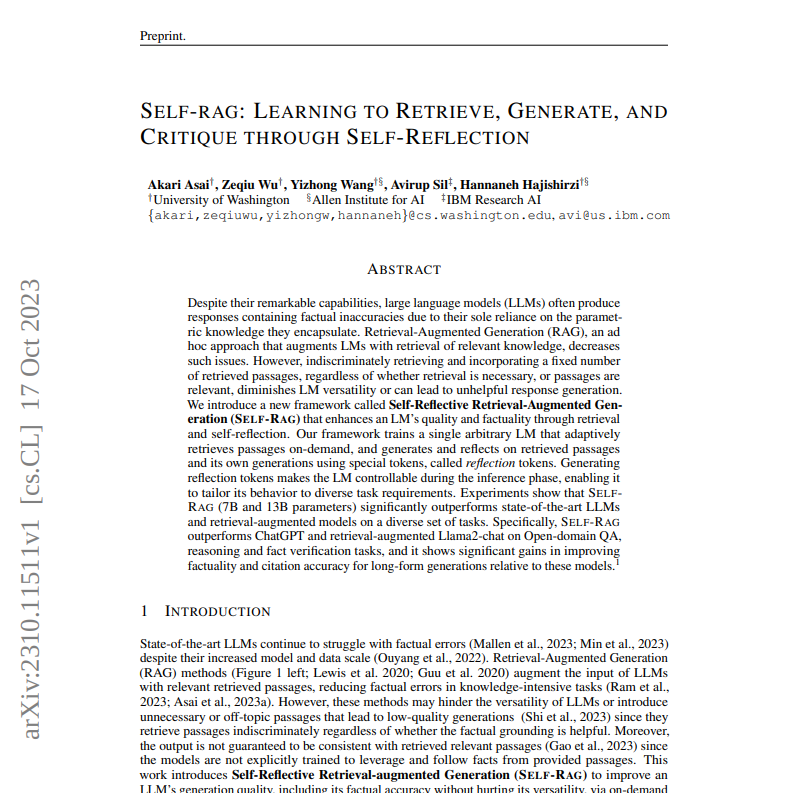

[link](https://arxiv.org/pdf/2310.11511)


here we want to add end to end self rag and self rag is derived from the self rag paper. <br> 

self rag is basically meaning that we are going to reflect on the answer that the model generated:
- `grounded in documents using hallucination_grader`: we are going to take the generation and we're going to compare it with the documents:<br>
  we're going to see whether the model hallucinated or not. So we need to check whether the answer is actually grounded in the documents. Now, if it's grounded, then that's cool. And we're ready to the second step.
- `grounded in question using answer_grader`: the second step is to reflect on the answer. However, now we want to reflect whether the answer answers the question that the user originally asked. And if the answer is yes for that, then this means we can return the answer to the user, and if the answer does not answer the question, then this probably means that we need to make a web search because we're not going to find any additional information in the vector store. And if we hallucinated the answer so it's not grounded in the documents, then we want to regenerate it again and to ground in the documents.

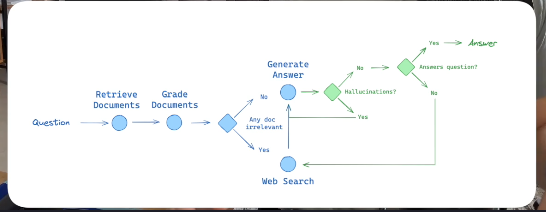

graph drawing:

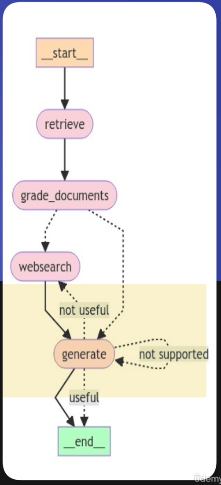